In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

#API Command
#Dataset->3 dots ->Copy API Command option

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:49<00:00, 23.6MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.1MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

#unzip zip file



*   Above code is to import kaggle dataset to colab without downloading it.
*   link of dataset: https://www.kaggle.com/datasets/salader/dogs-vs-cats



In [4]:
import tensorflow
from tensorflow import keras

#importing tensorflow fram work and it's library keras

In [5]:
from keras.preprocessing.image import ImageDataGenerator
train_valid_test_generate=ImageDataGenerator(rescale=1/255.0,
                             validation_split=0.2)


#code for normalizing image
# validation_split perameter is to set validation data size form training data
#in our case it is 20% of training data
# we devide by 255.0 why??

* as all the colors are covered between 0 to 255 like 0 for black and 1 for white like wise
* we devide by 255.0 not by 255 as all the pixel value are the float value like 0.,1.,2. like wise and we know likes devieds like


In [8]:
train_set=train_valid_test_generate.flow_from_directory(directory="/content/train",
                                                      class_mode='binary',
                                                      color_mode='rgb',
                                                      batch_size=32,
                                                      target_size=(256,256),
                                                      subset='training',
                                                      shuffle=False)

validation_set=train_valid_test_generate.flow_from_directory(directory="/content/train",
                                                            class_mode='binary',
                                                            color_mode='rgb',
                                                            batch_size=32,
                                                            target_size=(256,256),
                                                            subset='validation',
                                                            shuffle=False)

test_set=train_valid_test_generate.flow_from_directory(directory="/content/test",
                                                       class_mode='binary',
                                                       color_mode='rgb',
                                                       target_size=(256,256),
                                                       )

#here we apply some preprocessing of data


Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.




1.   directory: path of of your test/validation/test data
2.   class_mode: how many classes are there binart/categorical/input
*    in case of 2 class it is binary,
*    in case of more then 2 classes categorical
*    in case of Autoencoder when input and output image are same then input
3.   color_mode": image is rgb or grayscale
*    rgb: colourful image
*    grayscale: black and white image
4.   target size: image are converted into (x,y) to (x_new,y_new)
*    in case of non equivalent image size
5.   subset: validation/training
*    if training then 20%(validation_split) of training data redused for validation data and 80% of data stored in train_set variable
*    if validation then 20% of data stord in validation_set variable
6.   shuffle: True/False
*    if True then data is shuffuled and if False then data splitted in alphabatical orderwise




In [9]:
print(train_set)
print(validation_set)
print(test_set)

In [10]:
from keras import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

#importing Sequential class as we want to make Sequential model
#importing layer which we are going to use



1.   Conv2D: Convolution Layer
2.   MaxPooling2D: Max pooling layer
3.   Flatten: to convert 3D image into 1D image
4.   Dens: Fully Connected Layer(ANN)

In [11]:
model = Sequential()

model.add(Conv2D(16,kernel_size=(3,3),padding='same',strides=1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=1,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding='same',strides=1,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=1,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='same',strides=1,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=1,padding='valid'))

model.add(Flatten())

model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


#model architecture

1. model.add(): to add layer
2. 16,32,64 are the number of filters/no of nodes/neurons
*  advisable in power of 2 and and in decreasing order
*  power of 2 because to reduce computational cost
3. kernel size: size of the filter ->any size
4. padding: valid/same
*  "image size remain same"
*  want to appy padding then use same otherwise valid
5. strides: no of jumps on pixels while sliding the filter(convolution filter and padding filter/matrix(2,2))
*  if 1 then one i pixel jump, if 2 then 2 pixel jump
*  those jumps are vertical as well horizontal in both the direction
6. activation: which activation function we want to use relu/sigmoid/tanh etc...
7. Flatten() means conveting 3D metrics into 1D
8. Dense means a Fully Connected Layer
9. in that 16,8,4,2,1 are the no of nodes
*  as it is binary classification problem and we use sigmoid function so in last layer no of node has to be 1
*  it is advisable thet nodes in Dense layer are in decreasing order and in the power of 2


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 255, 255, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 255, 255, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 254, 254, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 254, 254, 64)      18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 253, 253, 64)      0

* Trainable perameter calculation:

1. convolution layer 0
* (16 * 3 * 9)+16 = 432 + 16 = 448
* **(no of filter/nodes at currunt layer * no of nodes at previous layer * kerne/filter size )+ no of filter**
* 16 = No of filter/node at currut layer
* 3 =  No of filter/node at currunt layer or **if not exist** then for rgb it is 3 and for grayscale it is 1 **only for first layer**
* **as first layer do not have no of nodes at previous layer**


2. convolution layer 1
* no of filter/nodes at currunt layer= 32
* no of filter/nodes at previous layer= 16
* kernel/filter size= 3*3 = 9
* **trainable perameters= (32 * 16 * 9) + 32 = 4640**

3. convolution layer 2
* no of nodes/filter at layer 2 = 64
* no of nodes/filte at layer 1 = 32
* kernel/filter size = 9

* **(64 * 32 * 9) + 64 = *18496*

# for dense layer formula little bit change:-
* **You know that,**
* after flatten each pixel value of metrix go individually in a neural network as a single input, so we can say that **no at nodes of previous layer** as each pixel treated as node.
* **Trainable perameter = no of nodes at previous layer * no at nodes of currunt layer + no at nodes of currunt layer**

1. Dense layer 0
* no of nodes at previous layer = 253 * 253 * 64 = 4096576 (as last layer is  max_pooling2d_2)
* no of nodes at currunt layer = 16
* **Trainable perameters =  4096576 * 16 + 16 =  65545232**

2. Dense layer 1
* no of nodes at previous layer = 16
* no of nodes at currunt layer = 8
* **Trainable perameters =  16 * 8 + 8 =  136**

3. Dense layer 2
* no of nodes at previous layer = 8
* no of nodes at currunt layer = 4
* **Trainable perameters =  8 * 4 + 4 =  36**



# How this metrics shape are calculated??, for that you have to understood theory of
1. Convolution Layer
2. Theory of padding
3. Theory of strides
4. Theory of pooling

In [13]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

#here in compile function I give optimizer= Adam
#as it is binary classification problem I use loss "binary_crossentropy"
#metrics=['accuracy'] as I want to see accuracy while training

In [14]:
history=model.fit(train_set,epochs=7,validation_data=validation_set)

#model training
#we have to pass train data,no of epochs and validation data in the fit function
#significant of validation data is to test model while training

Epoch 1/7
500/500 [==============================] - 134s 244ms/step - loss: 0.7288 - accuracy: 0.5001 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/7
500/500 [==============================] - 111s 222ms/step - loss: 0.6934 - accuracy: 0.4720 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/7
500/500 [==============================] - 108s 215ms/step - loss: 0.6934 - accuracy: 0.4760 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/7
500/500 [==============================] - 105s 210ms/step - loss: 0.6934 - accuracy: 0.4940 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/7
500/500 [==============================] - 106s 211ms/step - loss: 0.6934 - accuracy: 0.4740 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/7
500/500 [==============================] - 106s 211ms/step - loss: 0.6934 - accuracy: 0.4840 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/7
500/500 [==============================] - 105s 210ms/step - loss: 0.6933 - accuracy: 0.4940 - val_loss: 0.6931 - val_ac

# As I made this model for understanding perpose "How CNN works?" so. ignore accuracy as of now!!

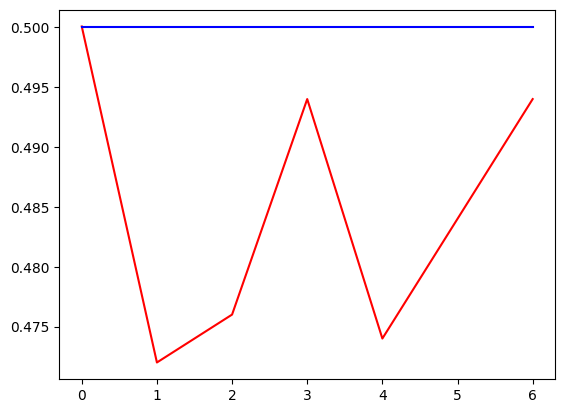

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"],label="training",color='red')
plt.plot(history.history["val_accuracy"],label="validation",color="blue")

#plottinf graph: training accuracy v/s epochs and validation accuracy v/s epochs
#helps in model evaluation

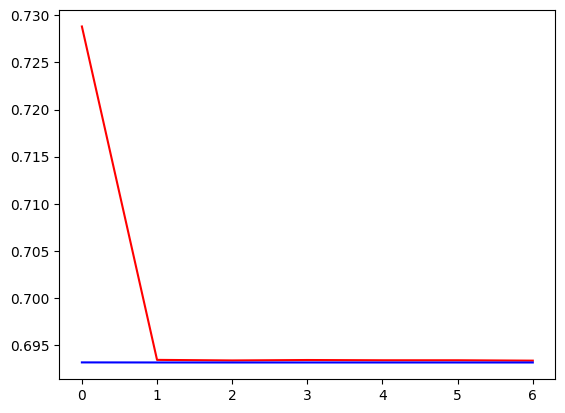

In [18]:
plt.plot(history.history["loss"],label="training",color='red')
plt.plot(history.history["val_loss"],label="validation",color='blue')

#plottinf graph: training loss v/s epochs and validation loss v/s epochs
#helps in model evaluation

# again, don't focus on model performance as of now.